<a href="https://colab.research.google.com/github/akiabe/coursera-ml-stanford/blob/master/ml_ex2_Logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Build logistic regresion from scratch**

In [1]:
import numpy as np

# Load training data set
data = np.loadtxt(open("ex2data1.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
print ("X shape: " + str(X.shape))
print ("y shape: " + str(y.shape))

X shape: (100, 2)
y shape: (100,)


In [2]:
X[0:5, 0:2]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [3]:
y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting data
def plot_data(X, y):
  """
  Arguments:
  X -- Data of X axis (n, 2)
  y -- Data of y axis (n,)

  """
  pos = np.argwhere(y == 1)
  neg = np.argwhere(y == 0)
  
  plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='+', color='k')
  plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='y')

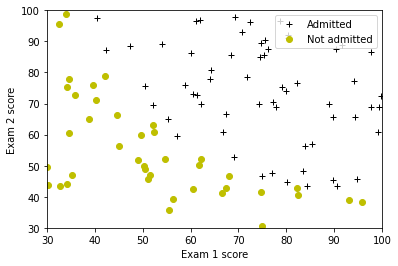

In [5]:
plt.figure()
plot_data(X, y)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim([30, 100])
plt.ylim([30, 100])
plt.legend(['Admitted', 'Not admitted'], loc='upper right', numpoints=1)
plt.show()

In [6]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape
# Add intercept term to x and X_test
X = np.hstack((np.ones((m, 1)), X))
# Initialize fitting parameters
theta = np.zeros(n + 1) 

print ("X shape: " + str(X.shape))
print ("y shape: " + str(y.shape))

X shape: (100, 3)
y shape: (100,)


In [0]:
# Sigmoid function
def sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

In [0]:
# Compute cost and gradient
def cost_function(theta, X, y):
  m, n = X.shape

  h = sigmoid(np.dot(X, theta.T))
  J = (1/m) * np.sum(np.dot((-y), np.log(h))-np.dot((1-y), np.log(1-h)))
  grad = (1/m) * (np.dot((h-y), X))
  
  return J, grad

In [9]:
cost, grad = cost_function(theta, X, y)

print ("Cost at initial theta (zeros): ", cost)
print ("Gradient at initial theta (zeros): ", grad)

Cost at initial theta (zeros):  0.6931471805599453
Gradient at initial theta (zeros):  [ -0.1        -12.00921659 -11.26284221]


In [10]:
# Optimize cost function
import scipy.optimize as opt

theta, nfeval, rc = opt.fmin_tnc(func=cost_function, x0=theta, args=(X, y))

cost, _ = cost_function(theta, X, y)
print("Cost at theta found by fminunc :", cost)
print("theta :", theta)

Cost at theta found by fminunc : 0.203497701589475
theta : [-25.16131851   0.20623159   0.20147148]


In [0]:
def map_feature(X1, X2):

    """
    Feature mapping function to polynomial features
    
    Arguments:
    X1 -- Input feature (n_samples,)
    X2 -- Input feature (n_samples,)
    
    Returns:
    Out -- New feature array with more features, comprising of X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
           (n_samples, 28)
    """
    degree = 6
    Out = np.ones(len(X1))

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            tmp = np.power(X1, i - j) * np.power(X2, j)
            Out = np.vstack((Out, tmp))
    return Out.T

In [0]:
def plot_decision_boundary(theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta
    
    Arguments:
    theta -- Linear regression parameter (n_features,)
    X -- Training data, where n_samples is the number of samples and n_features is the number of features.
         (n_samples, n_features)
    y -- Labels (n_samples,)

    """
    if X.shape[1] <= 3:
        plot_X = np.array([np.amin(X[:, 1]) - 2, np.amax(X[:, 1]) + 2])
        plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
        plt.plot(plot_X, plot_y)
    else:
        u = np.linspace(-1, 1.5, 50)
        # u.resize((len(u), 1))
        v = np.linspace(-1, 1.5, 50)
        # v.resize((len(v), 1))
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = map_feature(u[i:i+1], v[j:j+1]).dot(theta)
        z = z.T
        u, v = np.meshgrid(u, v)
        cs = plt.contour(u, v, z, levels=[0])
        fmt = {}
        strs = ['Decision boundary']
        for l, s in zip(cs.levels, strs):
            fmt[l] = s

        plt.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)

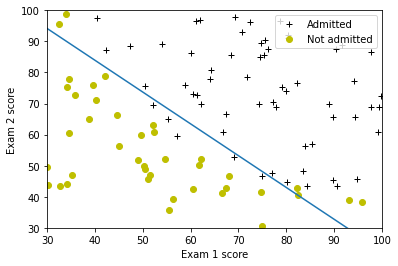

In [16]:
plt.figure()
plot_data(X[:, 1:], y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim([30, 100])
plt.ylim([30, 100])
plt.legend(['Admitted', 'Not admitted'], loc='upper right', numpoints=1)

# Plot Boundary
plot_decision_boundary(theta, X, y)
plt.show()

In [11]:
# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2
prob = sigmoid(np.dot(np.array([1, 45, 85]), theta))
print("For a student with scores 45 and 85, we predict an admission probability of", prob)

For a student with scores 45 and 85, we predict an admission probability of 0.7762906214285727


In [0]:
# The predict() predicts the input data with learned logistic regression parameters
def predict(theta, X):
  m = X.shape[0]
  p = np.zeros(m)
  p = np.round(sigmoid(np.dot(X, theta.T)))
  return p

In [13]:
p = predict(theta, X) 
accuracy = np.mean(p==y)*100
print ("% of train accuracy: " + str(accuracy))

% of train accuracy: 89.0
